In [1]:
 # !pip install pandas numpy matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

In [4]:
# Question 1: Number of distinct bookings, sessions, and searches
num_bookings = bookings['booking_id'].nunique()
num_sessions = sessions['session_id'].nunique()
num_searches = sessions['search_id'].nunique()
print(f'Distinct Bookings: {num_bookings}, Distinct Sessions: {num_sessions}, Distinct Searches: {num_searches}')


Distinct Bookings: 339, Distinct Sessions: 331, Distinct Searches: 1360


In [5]:
# Question 2: Sessions with more than one booking
sessions_with_bookings = sessions.dropna(subset=['booking_id'])
multi_booking_sessions = sessions_with_bookings.groupby('session_id').filter(lambda x: len(x) > 1)
num_multi_booking_sessions = multi_booking_sessions['session_id'].nunique()
print(f'Sessions with more than one booking: {num_multi_booking_sessions}')

Sessions with more than one booking: 35


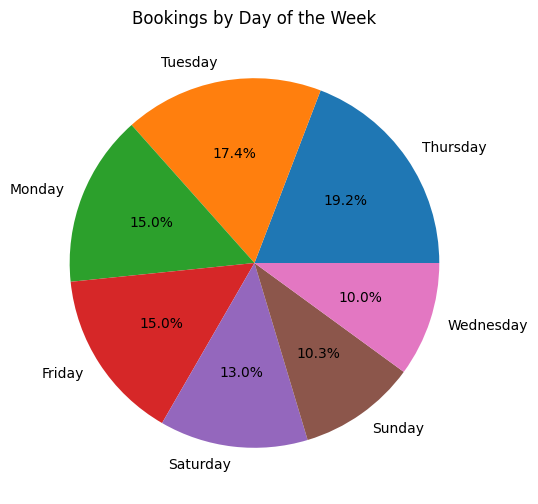

In [6]:
# Question 3: Days of the week with the highest number of bookings
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()
day_counts = bookings['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
day_counts.plot.pie(autopct='%1.1f%%')
plt.title('Bookings by Day of the Week')
plt.ylabel('')
plt.show()

In [7]:
# Question 4: Total number of bookings and total Gross Booking Value in INR for each service
service_summary = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gbv=('INR_Amount', 'sum')
).reset_index()
print(service_summary)


  service_name  total_bookings   total_gbv
0      GOIBIBO             186  5897637.97
1          MMT              48   665669.08
2        YATRA             105  3378702.13


In [8]:
# Question 5: Most booked route for customers with more than 1 booking
multi_booking_customers = bookings.groupby('customer_id').filter(lambda x: len(x) > 1)
most_booked_route = multi_booking_customers.groupby(['from_city', 'to_city']).size().idxmax()
print(f'Most booked route: {most_booked_route}')

Most booked route: ('Gurgaon', 'Roissy-en-France')


In [9]:
# Question 6: Top 3 departure cities for advance bookings with at least 5 departures
advance_departures = bookings.groupby('from_city').filter(lambda x: len(x) >= 5)
top_advance_cities = advance_departures.groupby('from_city')['days_to_departure'].mean().nlargest(3)
print(f'Top 3 departure cities for advance bookings: {top_advance_cities}')

Top 3 departure cities for advance bookings: from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


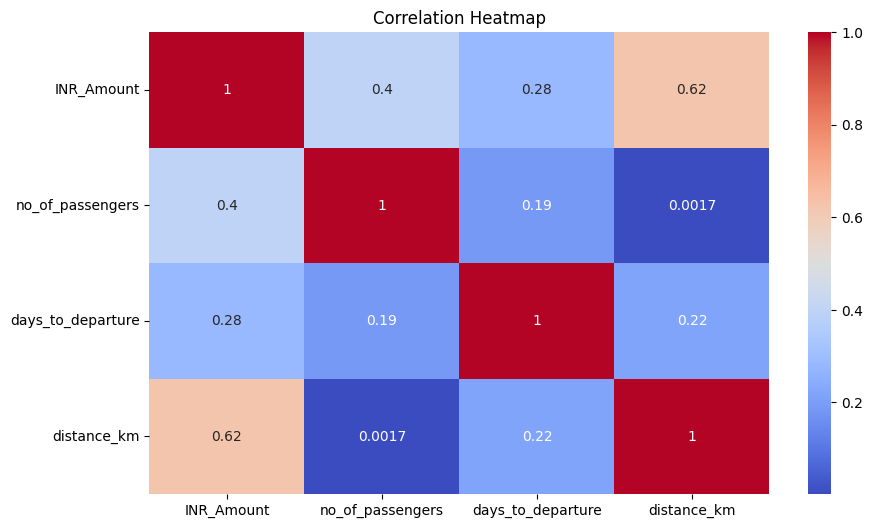

Highest correlation between: ('INR_Amount', 'INR_Amount')


In [10]:
#Question 7: Correlation heatmap
numeric_cols = bookings.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

max_corr_pair = corr.abs().unstack().sort_values(ascending=False).drop_duplicates().idxmax()
print(f'Highest correlation between: {max_corr_pair}')

In [12]:
# Question 8: Most used device type for each service
device_summary = bookings.groupby(['service_name', 'device_type_used']).size().unstack().idxmax(axis=1)
print(device_summary)


service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
dtype: object


C:\Users\yashu\AppData\Local\Temp\ipykernel_9388\2606463761.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')


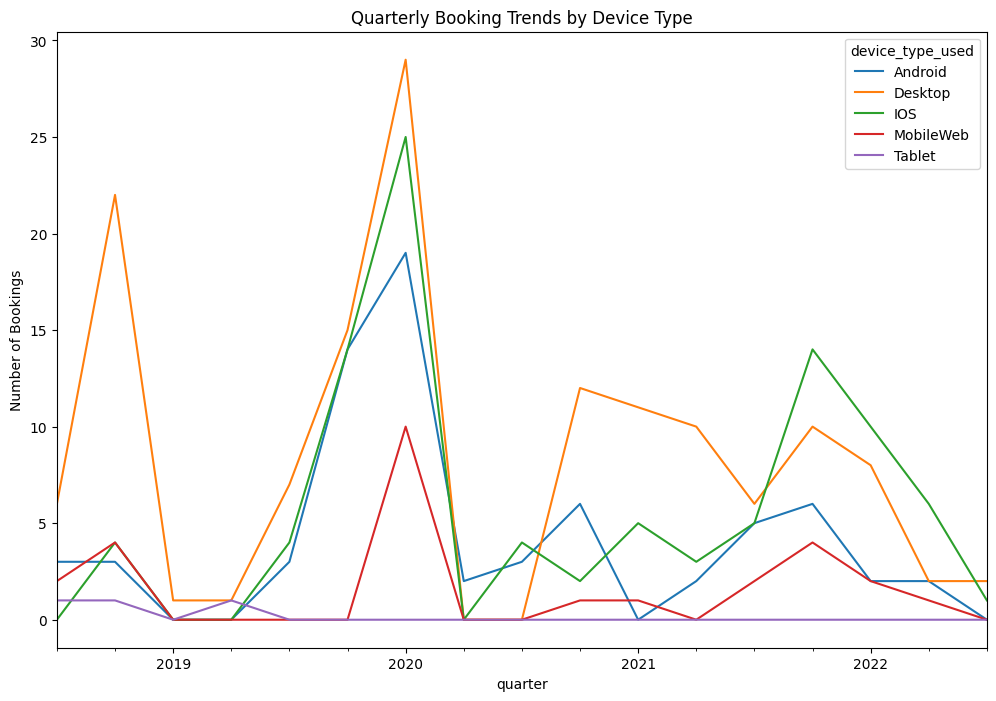

In [13]:
# Question 9: Trends at quarterly frequency for number of bookings by device type
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')
quarterly_trends = bookings.groupby(['quarter', 'device_type_used']).size().unstack().fillna(0)
quarterly_trends.plot(figsize=(12, 8))
plt.title('Quarterly Booking Trends by Device Type')
plt.ylabel('Number of Bookings')
plt.show()

C:\Users\yashu\AppData\Local\Temp\ipykernel_12284\3109959929.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sessions['month'] = sessions['search_time'].dt.to_period('M')
C:\Users\yashu\AppData\Local\Temp\ipykernel_12284\3109959929.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_obsr = sessions.groupby('month').apply(lambda x: x['booking_id'].nunique() / x['search_id'].nunique())
C:\Users\yashu\AppData\Local\Temp\ipykernel_12284\3109959929.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the op

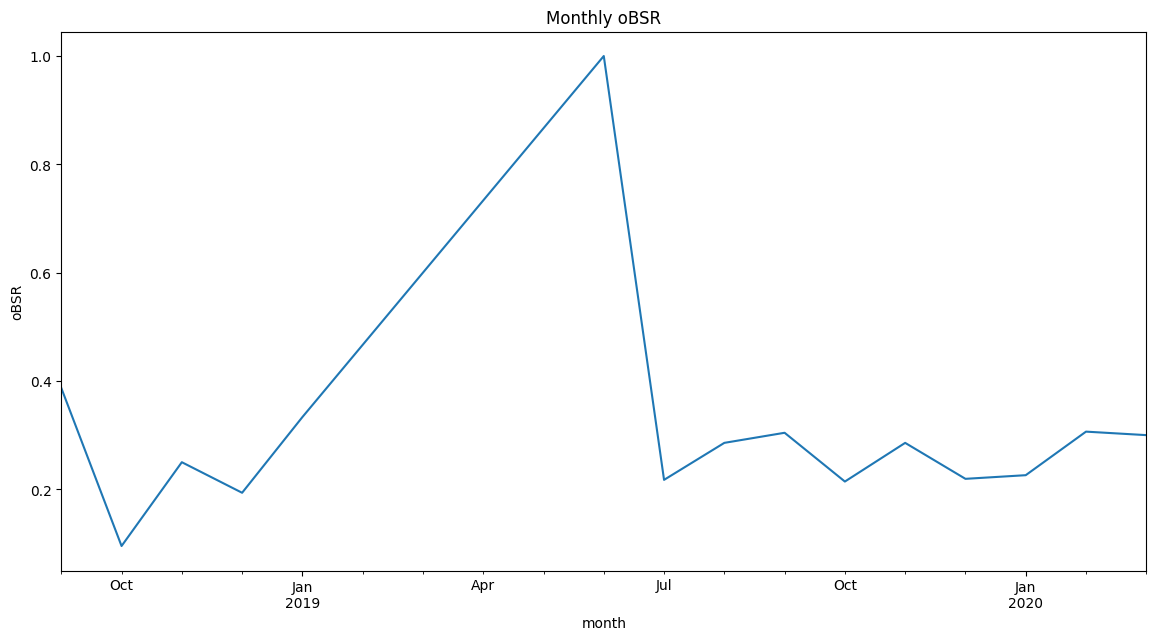

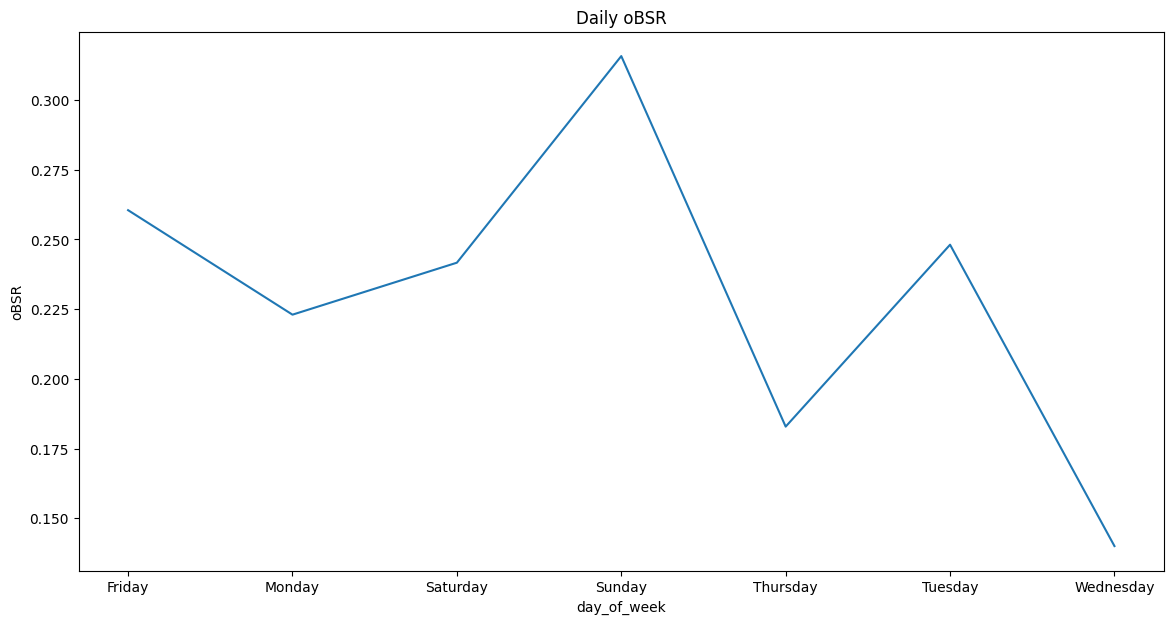

In [12]:
# Convert the search_time column to datetime
sessions['search_time'] = pd.to_datetime(sessions['search_time'], errors='coerce')

# Drop rows with invalid datetime
sessions = sessions.dropna(subset=['search_time'])

# Continue with the analysis for Question 10
sessions['month'] = sessions['search_time'].dt.to_period('M')
sessions['day_of_week'] = sessions['search_time'].dt.day_name()
monthly_obsr = sessions.groupby('month').apply(lambda x: x['booking_id'].nunique() / x['search_id'].nunique())
daily_obsr = sessions.groupby('day_of_week').apply(lambda x: x['booking_id'].nunique() / x['search_id'].nunique())

plt.figure(figsize=(14, 7))
monthly_obsr.plot()
plt.title('Monthly oBSR')
plt.ylabel('oBSR')
plt.show()

plt.figure(figsize=(14, 7))
daily_obsr.plot()
plt.title('Daily oBSR')
plt.ylabel('oBSR')
plt.show()
plt.show()